In [8]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import IPython.display as ipd

from ipywidgets import widgets

In [9]:
from implementations import frames_to_time, amplitude_envelope
from utilities import plot_waveform

## First load example sound files and display their waveforms

In [10]:
# Use librosa to load in the sound files
snaredrum, sr = librosa.load("example_data/snaredrum_2.wav")
hihat, _ = librosa.load("example_data/hihat_3.wav")
clarinet, _ = librosa.load("example_data/clarinet.wav")

In [11]:
# Set the styling of the widget outputs
css_widget = widgets.HTML("<style> .cell-output-ipywidget-background{background-color: transparent !important;} h3{color: white; text-align: center;}</style>")
ipd.display(css_widget)

# Listen to the soundfiles
elements = []
elements.append(widgets.VBox([widgets.HTML("<h3> Snaredrum </h3>"), widgets.Audio(value=ipd.Audio(data=snaredrum, rate=sr).data)]))
elements.append(widgets.VBox([widgets.HTML("<h3> Hihat </h3>"), widgets.Audio(value=ipd.Audio(data=hihat, rate=sr).data)]))
elements.append(widgets.VBox([widgets.HTML("<h3> Clarinet </h3>"), widgets.Audio(value=ipd.Audio(data=clarinet, rate=sr).data)]))
ipd.display(widgets.HBox(elements))

HTML(value='<style> .cell-output-ipywidget-background{background-color: transparent !important;} h3{color: whi…

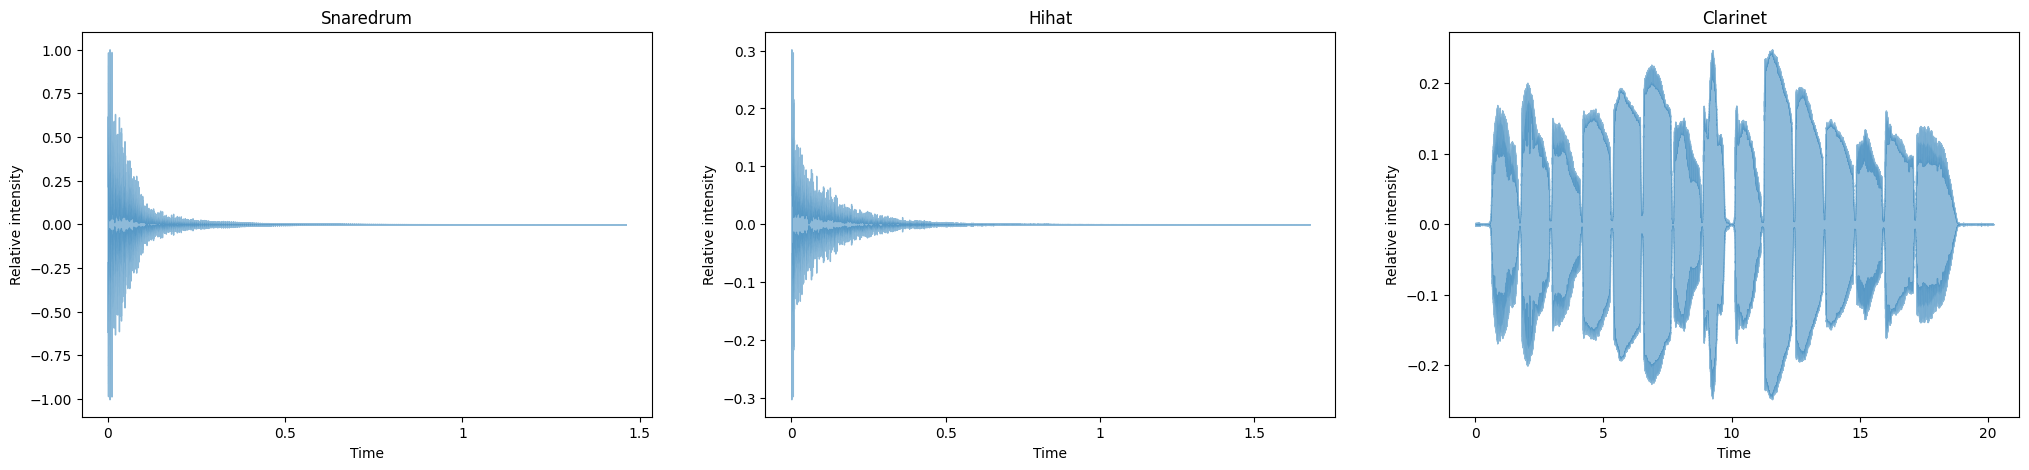

In [12]:
# Plot on different subplots
plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
plot_waveform(snaredrum, sr, "Snaredrum")

plt.subplot(1, 3, 2)
plot_waveform(hihat, sr, "Hihat")

plt.subplot(1, 3, 3)
plot_waveform(clarinet, sr, "Clarinet")

plt.show()

## For each waveform, display the Amplitude Envelope, RMS and Zero-Crossing Rate

In [13]:
# Time domain audio features are calculated over frames
FRAME_SIZE = 2048
HOP_SIZE = 256

In [14]:
snaredrum_envelope = amplitude_envelope(snaredrum, FRAME_SIZE, HOP_SIZE)
snaredrum_times = frames_to_time(snaredrum_envelope, HOP_SIZE)

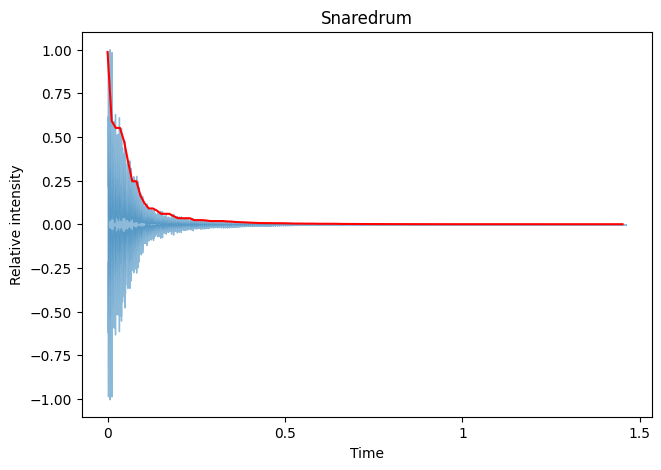

In [15]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
plot_waveform(snaredrum, sr, "Snaredrum")
plt.plot(snaredrum_times, snaredrum_envelope, c="r")

plt.show()